# One-click Gaussian Process Regression Tutorial
This Tutorial displays the one-click training of GPR models using the MFF package and the auxiliary functions contained in utility.py. <br/>
For a more complete introduction to advanced uses of the MFF Python package, the user is directed to the "Advanced Tutorial" notebook.

Please note that models in this notebook are not meant to display the highest possible accuracy achievable by the module on the different systems, <br/>
but rather to provide the user with a quick overview of the options available while using MFF.

For best accuracy results, we reccomend using the "combined" kernel. <br/>
We also recommend using at least 500 training points in the case of single-element systems, 2000 for 2-elements systems and 4000 for 3-elements systems. 

### Import
Import the utility module from mff and set the plot to inline in order to visualize plots in the notebook.

In [1]:
from mff import utility as uf
%matplotlib inline

### Example 1
#### One element, force-only training and testing, 2-body kernel.
In this example we extract data coming from a DFT MD simulation of a Nickel 19 nanoparticle which contains different isomers. <br/>
We train on forces and predict forces using the simplest and fastest kernel available, the 2-body kernel.

In [2]:
train_folder = "data/Ni_19/"    # Path to the folder containing the trajectory file and the GP files and folders
traj_filename = "movie.xyz"       # Name of the trajectory file that will provide training and test data.
cutoff = 6.5                             # Cutoff [Angstrom] to be used to define local atomic environments. Larger cutoffs could lead to better accuracy, at the price of slower computations
test_folder = None                       # Name of the folder containing the files on which to test upon, to use only to test a model from a dataset onto another dataset.
training_points = 50                    # Number of points to use in training. If train_mode is "force_and_energy", this is the number of force training points to use.
test_points = 100                        # Number of points to use in testing. If test_mode is "force_and_energy", this is the number of force test points to use.
kernel = "2b"                            # Kernel function to use, can be "2b", "3b" or "combined". We suggest "2b" for quick results, "combined" for accurate ones.
sigma = 0.4                              # Lengthscale parameter [Angstrom] of the kernel function. Usually should be between 0.2 and 2 Angstrom.
noise = 0.001                            # Noise associated to the training points used. Should be between 1e-2 and 1e-5.
sampling = "random"                      # Sampling algorithm to use. Can be "random", "grid2" or "grid3".
nbins = None                             # Specify the number of bins to use for "grid2" or "grid3" sampling algorithms. If None, bins are selected so to match the number of training points indicated above.
ncores = 1                               # Number of cores to use for the fitting process. Multi-core is more efficient only for "combined" kernel and more than 100 training points.
train_mode = "force"                     # Choose whether to train on "force" data, "energy" data or "force_and_energy" data
test_mode = "force"                      # Choose whether to test on "force" data, "energy" data or "force_and_energy" data
plot = True                              # Boolean variable indicating whether to display scatter plot of the predictions

One-line command that looks for the trajectory file, extracts local atomic environments, forces, global atomic environments and total energies (if present), 
chooses the appropriate gaussian process model, samples training and test data, trains the Gaussian Process module and tests it on the test data. <br/>
It then saves the GP object and the report of the errors done during testing, and displayes a scatter plot for the force and/or energy predictions made, alongside 
some significant statistics of the error incurred by the GPR model. <br/>

Extracted data from movie.xyz
Loading Kernels
Training using 50 points on 1 cores
Seconds for training: 0.69
Saved Gaussian process with name: data/Ni_19/models/GP_ker_TwoBodySingleSpecies_ntr_50.npy
Testing the force prediction on 100 configurations

RMSE: 0.1784 eV/A
MAEC: 0.1344 eV/A
MAEF : 0.2646 +- 0.1596 eV/A
Relative MAEF: 0.4350 +- 0.2624


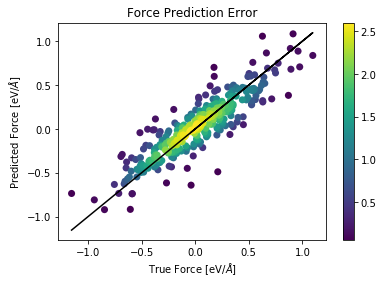

Saved report of errors.


In [4]:
model = uf.train_and_test_gp(train_folder, traj_filename, cutoff, test_folder, training_points, test_points,
            kernel, sigma, noise, sampling, nbins, ncores, train_mode, test_mode, plot=plot)

In [4]:
train_folder = "data/AuAg/"           # Path to the folder containing the trajectory file and the GP files and folders
traj_filename = "movie.xyz"              # Name of the trajectory file that will provide training and test data.
cutoff = 5.3                            # Cutoff [Angstrom] to be used to define local atomic environments. Larger cutoffs could lead to better accuracy, at the price of slower computations
test_folder = None                       # Name of the folder containing the files on which to test upon, to use only to test a model from a dataset onto another dataset.
training_points = 200                    # Number of points to use in training. If train_mode is "force_and_energy", this is the number of force training points to use.
test_points = 100                        # Number of points to use in testing. If test_mode is "force_and_energy", this is the number of force test points to use.
kernel = "2b"                            # Kernel function to use, can be "2b", "3b" or "combined". We suggest "2b" for quick results, "combined" for accurate ones.
sigma = 0.4                              # Lengthscale parameter [Angstrom] of the kernel function. Usually should be between 0.2 and 2 Angstrom.
noise = 0.001                            # Noise associated to the training points used. Should be between 1e-2 and 1e-5.
sampling = "random"                       # Sampling algorithm to use. Can be "random", "grid2" or "grid3".
nbins = None                             # Specify the number of bins to use for "grid2b" or "grid3b" sampling algorithms. If None, bins are selected so to match the number of training points indicated above.
ncores = 1                               # Number of cores to use for the fitting process. Multi-core is more efficient only for "combined" kernel and more than 100 training points.
train_mode = "force"                     # Choose whether to train on "force" data, "energy" data or "force_and_energy" data
test_mode = "force"                      # Choose whether to test on "force" data, "energy" data or "force_and_energy" data
plot = True                              # Boolean variable indicating whether to display scatter plot of the predictions

One-line command that looks for the trajectory file, extracts local atomic environments, forces, global atomic environments and total energies (if present), 
chooses the appropriate gaussian process model, samples training and test data, trains the Gaussian Process module and tests it on the test data. <br/>
It then saves the GP object and the report of the errors done during testing, and displayes a scatter plot for the force and/or energy predictions made, alongside 
some significant statistics of the error incurred by the GPR model. <br/>

Opened data from data/AuAg/
Loaded data from data/AuAg/
Loading Kernels
Training using 200 points on 1 cores
Seconds for training: 10.05
Saved model with name: MODEL_ker_TwoBody_ntr_200.json
Testing the force prediction on 100 configurations

RMSE: 0.2286 eV/A
MAEC: 0.1619 eV/A
MAEF : 0.3221 +- 0.2301 eV/A
Relative MAEF: 0.4668 +- 0.3334


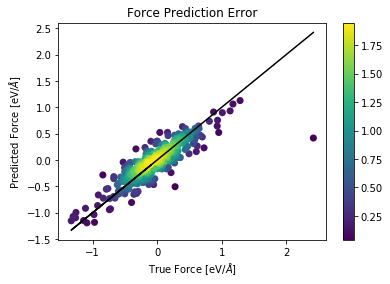

Saved report of errors.


In [5]:
model = uf.train_and_test_gp(train_folder, traj_filename, cutoff, test_folder, training_points, test_points,
            kernel, sigma, noise, sampling, nbins, ncores, train_mode, test_mode, plot=plot)

### Example 3
#### One element, force and energy training and testing, 2-body kernel, grid sampling.
In this example we extract data coming from a DFT MD simulation of a Nickel 19 nanoparticle which contains different isomers. <br/>
We train on forces and energies and predict forces and energies using the simplest and fastest kernel available, the 2-body kernel. <br/>
The training data is selected according to a descriptor-space sampling algorithm where the descriptor is the interatomic distance. <br/>
Please note that, due to the nature of the sampling method used, the effective number of training points used could differ slightly from the one set by the user.

In [7]:
train_folder = "data/Ni_19/"
traj_filename = "movie.xyz"
cutoff = 8.0
test_folder = None
training_points = 200
test_points = 100
kernel = "2b"
sigma = 0.4
noise = 0.001
sampling = "grid2"
nbins = None
ncores = 1
train_mode = "force_and_energy"
test_mode = "force_and_energy"
plot = True
f_e_ratio = 50                          # If train_mode = "force_and_energy", this number indicates the ratio between the number of force traiing points and the energy training points.

One-line command that looks for the trajectory file, extracts local atomic environments, forces, global atomic environments and total energies (if present), 
chooses the appropriate gaussian process model, samples training and test data, trains the Gaussian Process module and tests it on the test data. <br/>
It then saves the GP object and the report of the errors done during testing, and displayes a scatter plot for the force and/or energy predictions made, alongside 
some significant statistics of the error incurred by the GPR model. <br/>

Extracted data from movie.xyz
Loading Kernels
Training using 230 points on 1 cores
Seconds for training: 16.42
Saved Gaussian process with name: data/Ni_19/models/GP_ker_TwoBodySingleSpecies_ntr_233.npy
Testing the force prediction on 100 configurations

RMSE: 0.1556 eV/A
MAEC: 0.1178 eV/A
MAEF : 0.2335 +- 0.1344 eV/A
Relative MAEF: 0.3664 +- 0.2109


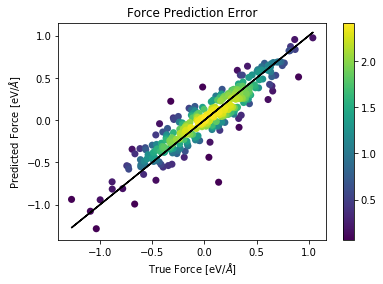

Testing the energy prediction on 5 configurations

Energy RMSE: 0.02602 eV
Energy MAE : 0.0230 +- 0.0122 eV


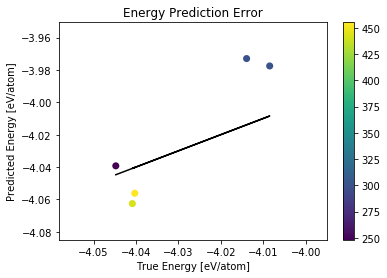

Saved report of errors.


In [8]:
model = uf.train_and_test_gp(train_folder, traj_filename, cutoff, test_folder, training_points, test_points,
            kernel, sigma, noise, sampling, nbins, ncores, train_mode, test_mode, f_e_ratio, plot)

### Example 4
#### One element, force-only training and testing, combined kernel, random sampling. Launched on 2 cores.
In this example we extract data coming from various DFT MD simulation of Fe containing grain boundaries and defects. <br/>
We train on forces and predict forces using the combined kernel, which is slower than the 2-body but more accurate with enough training points. <br/>
The training data is selected according to random sampling. <br/>
Few training points are here used for quickness, better accuracies can be obtained with 500-1000 trianing points (this would take some hours). <br/>

In [4]:
train_folder = "data/Fe/"       # Path to the folder containing the trajectory file and the GP files and folders
traj_filename = "movie.xyz"              # Name of the trajectory file that will provide training and test data.
cutoff = 4.45                             # Cutoff [Angstrom] to be used to define local atomic environments. Larger cutoffs could lead to better accuracy, at the price of slower computations
test_folder = None                       # Name of the folder containing the files on which to test upon, to use only to test a model from a dataset onto another dataset.
training_points = 200                     # Number of points to use in training. If train_mode is "force_and_energy", this is the number of force training points to use.
test_points = 100                        # Number of points to use in testing. If test_mode is "force_and_energy", this is the number of force test points to use.
kernel = "combined"                      # Kernel function to use, can be "2b", "3b" or "combined". We suggest "2b" for quick results, "combined" for accurate ones.
sigma = 0.5                              # Lengthscale parameter [Angstrom] of the kernel function. Usually should be between 0.2 and 2 Angstrom.
noise = 0.001                            # Noise associated to the training points used. Should be between 1e-2 and 1e-5.
sampling = "random"                       # Sampling algorithm to use. Can be "random", "grid2" or "grid3".
nbins = None                             # Specify the number of bins to use for "grid2b" or "grid3b" sampling algorithms. If None, bins are selected so to match the number of training points indicated above.
ncores = 2                               # Number of cores to use for the fitting process. Multi-core is more efficient only for "combined" kernel and more than 100 training points.
train_mode = "force"                     # Choose whether to train on "force" data, "energy" data or "force_and_energy" data
test_mode = "force"                      # Choose whether to test on "force" data, "energy" data or "force_and_energy" data
plot = True                              # Boolean variable indicating whether to display scatter plot of the predictions
f_e_ratio = 1                          # If train_mode = "force_and_energy", this number indicates the ratio between the number of force traiing points and the energy training points.

One-line command that looks for the trajectory file, extracts local atomic environments, forces, global atomic environments and total energies (if present), 
chooses the appropriate gaussian process model, samples training and test data, trains the Gaussian Process module and tests it on the test data. <br/>
It then saves the GP object and the report of the errors done during testing, and displayes a scatter plot for the force and/or energy predictions made, alongside 
some significant statistics of the error incurred by the GPR model. <br/>

Opened data from data/PtCu_13/
Loaded data from data/PtCu_13/
Loading Kernels


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Loading Kernels
Training using 200 points on 2 cores
Seconds for training: 85.19
Saved Gaussian process with name: data/PtCu_13/models/GP_ker_TwoBodySingleSpecies_ntr_200.npy
Saved Gaussian process with name: data/PtCu_13/models/GP_ker_ThreeBodySingleSpecies_ntr_200.npy
Testing the force prediction on 100 configurations

RMSE: 0.1373 eV/A
MAEC: 0.107 eV/A
MAEF : 0.2118 +- 0.1082 eV/A
Relative MAEF: 0.3530 +- 0.1803


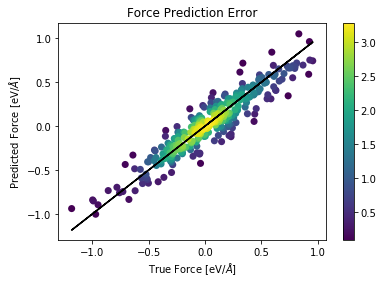

Saved report of errors.


In [5]:
model = uf.train_and_test_gp(train_folder, traj_filename, cutoff, test_folder, training_points, test_points,
            kernel, sigma, noise, sampling, nbins, ncores, train_mode, test_mode, f_e_ratio, plot=plot)